In [2]:
#r "nuget: SixLabors.ImageSharp"

Installed Packages SixLabors.ImageSharp, 2.1.3

In [3]:
#r "nuget: Plotly.NET, 2.0.0"
#r "nuget: Plotly.NET.Interactive, 2.0.0-preview.12"

Installed Packages Plotly.NET, 2.0.0 Plotly.NET.Interactive, 2.0.0-preview.12

Loading extensions from `Plotly.NET.Interactive.dll`

In [4]:
open SixLabors.ImageSharp
open SixLabors.ImageSharp.Processing

In [5]:
open System
open System.IO

In [6]:
let _dataPath =
    Path.Combine(Environment.CurrentDirectory, "..", "Data/dataset/images")

In [7]:
let image: Image<PixelFormats.Rgba32> =
    Image.Load(Path.Combine(_dataPath, "imori_256x256.png"))

In [8]:
open Plotly.NET

In [9]:
let ImageShow (img: Image) =
    let ms = new MemoryStream()
    let b64 = Convert.ToBase64String(img.SaveAsPng ms |> ms.ToArray)
    Chart.Image(
        Source=($"data:image/jpg;base64,{b64}")
    )

<!-- Plotly chart will be drawn inside this DIV -->
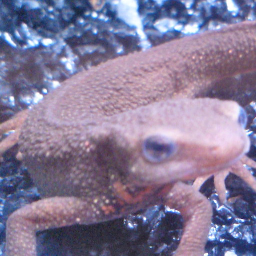

In [10]:
ImageShow image

In [11]:
let image2 = image.Clone(ignore)
image2.Mutate (fun x -> x.Resize (image2.Width/2, image2.Height/2)  |> ignore)

<!-- Plotly chart will be drawn inside this DIV -->
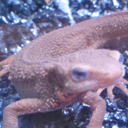

In [12]:
ImageShow image2

<!-- Plotly chart will be drawn inside this DIV -->
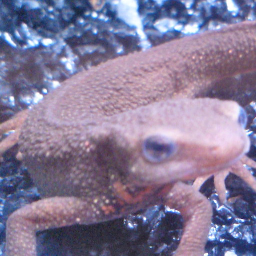
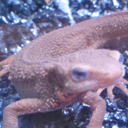

In [13]:
[
ImageShow image
ImageShow image2
] |> Chart.Grid (1,2)

In [14]:
let image3 = image.Clone(ignore)

In [37]:
image3.ProcessPixelRows (fun rows ->
    for y in 0..rows.Height-1 do
        let row = rows.GetRowSpan(y)
        for x in 0..row.Length-1 do
            let pixel = row[x]
            let (R, G, B, A) = (pixel.R, pixel.G, pixel.B, pixel.A)
            row[x] <- PixelFormats.Rgba32(B, G, R, A)
    |> ignore)

<!-- Plotly chart will be drawn inside this DIV -->
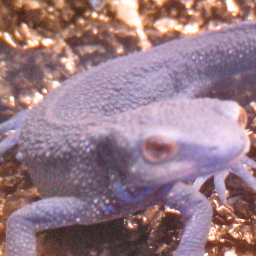

In [38]:
ImageShow image3

<!-- Plotly chart will be drawn inside this DIV -->
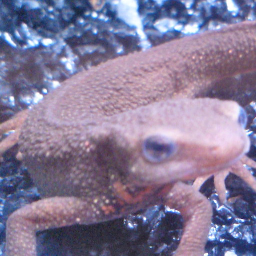
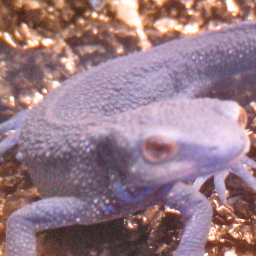

In [42]:
[
ImageShow image
ImageShow image3
] |> Chart.Grid (1,2)